# Зависимости

In [ ]:
!git clone https://github.com/shonenkov/asr-shad > /dev/null
!pip install -r './asr-shad/requirements.txt' > /dev/null

Cloning into 'asr-shad'...
remote: Enumerating objects: 428, done.
remote: Counting objects: 100% (428/428), done.
remote: Compressing objects: 100% (231/231), done.
remote: Total 428 (delta 258), reused 338 (delta 185), pack-reused 0
Receiving objects: 100% (428/428), 3.30 MiB | 8.60 MiB/s, done.
Resolving deltas: 100% (258/258), done.


In [ ]:
import sys
sys.path.insert(0, './asr-shad/utils')
from audio_stats import get_audio_stats

# Исходные данные:

https://drive.google.com/drive/folders/1mNGJOSyNKs9j7ZRuI80u9XAttRY3KXos

Необходимо добавить ярлык датасета к себе на диск, затем mount:


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
INPUT_DIR = "/content/drive/My Drive/Sirius project. Numbers"
!ls "{INPUT_DIR}"

numbers  numbers_sirius.ipynb  train_audio_stats.csv


In [ ]:
!ls 'drive/My Drive/Sirius project. Numbers'

numbers  numbers_sirius.ipynb  train_audio_stats.csv


# EDA

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 

sys.path.insert(0, '../utils')
from audio_stats import get_audio_stats, get_audio_meta

In [ ]:
train_csv = INPUT_DIR+"/numbers/train.csv"
train  = pd.read_csv(train_csv)
train.head(2)

,path,gender,number
0,train/e332b996d3.wav,female,157105
1,train/e25afda49a.wav,female,374554


In [ ]:
#числа не повторяются , значит девушка и парень произносят разные числа
np.max(train['number'].value_counts())

1

In [ ]:
%%time
audio_stats = get_audio_stats('drive/My Drive/Sirius project. Numbers/numbers/train')
audio_stats.head()

CPU times: user 14 s, sys: 10.4 s, total: 24.4 s
Wall time: 1h 53min 55s


In [ ]:
len(audio_stats)

9020

In [ ]:
stats = audio_stats.copy()
stats['filename'] = 'train/' + stats['filename']
stats.head(2)

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,train/d56ee4cb49.wav,1,64326,24000,128696,2.680250,16
1,train/9ddedee2aa.wav,1,83099,24000,166242,3.462458,16


In [ ]:
len(stats)

9020

In [ ]:
stats = stats.rename(columns={"filename": "path"})
stats.head(2)

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,train/d56ee4cb49.wav,1,64326,24000,128696,2.680250,16
1,train/9ddedee2aa.wav,1,83099,24000,166242,3.462458,16


In [ ]:
res = pd.merge(stats, train, on='path', how='outer', indicator=True)
res[res['_merge']!='both'].head()

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,gender,number,_merge
75,train/992e0e5ff5 (1).wav,1,83055,24000,166154,3.460625,16,NaN,NaN,left_only
374,train/2bdb5dcc30 (1).wav,1,73077,24000,146198,3.044875,16,NaN,NaN,left_only
773,train/7b7d0cbdea (1).wav,1,67298,24000,134640,2.804083,16,NaN,NaN,left_only
2691,train/59b8d39784 (1).wav,1,88865,24000,177774,3.702708,16,NaN,NaN,left_only
3053,train/0ab62c4d60 (1).wav,1,82179,24000,164402,3.424125,16,NaN,NaN,left_only


In [ ]:
#есть файлы с именами без единицы
res[res['path']=='train/992e0e5ff5.wav']

,path,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate,gender,number,_merge
79,train/992e0e5ff5.wav,1,83055,24000,166154,3.460625,16,male,782856.0,both


In [ ]:
res = train_audio_stats = pd.read_csv("/content/drive/My Drive/Sirius project. Numbers/train_audio_stats.csv")
res.head(2)

,filename,channels,frames,sample_rate_hz,size_bytes,duration_s,bitrate
0,c9f135a051.wav,1,62074,24000,124192,2.586417,16
1,ba12ffc49a.wav,1,70800,24000,141644,2.950000,16


In [ ]:
res['channels'].value_counts() ,res['bitrate'].value_counts(), res['sample_rate_hz'].value_counts()

(1    9000
 Name: channels, dtype: int64, 16    9000
 Name: bitrate, dtype: int64, 24000    9000
 Name: sample_rate_hz, dtype: int64)

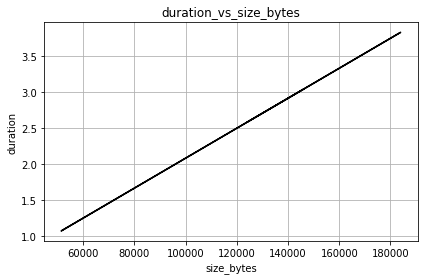

In [ ]:
plt.plot(res["size_bytes"], res['duration_s'], label="number_vs_duration", color="black")
plt.title("duration_vs_size_bytes")
plt.grid()
plt.xlabel("size_bytes")
plt.ylabel("duration")
plt.tight_layout()
plt.show()

In [ ]:
#чистим данные
index_of_copies =  res[res['_merge']!='both'].index.values.astype(int)
res =res.drop(index_of_copies)
res = res.drop(columns=['_merge','channels','bitrate','sample_rate_hz','size_bytes' ])
res

KeyError: ignored

In [ ]:

sys.path.insert(0, './asr-shad/')
from utils.text_stats import *

ModuleNotFoundError: ignored

In [ ]:
def num_of_letters(num):
  return len(num2text(num)) - len(num2text(num).split(' '))+1

In [ ]:
d = {'number': [i for i in res['number']], 
     'num_of_words': [len(num2text(i).split(' ')) for i in res['number']],
     'num_of_letters':[num_of_letters(i) for i in res['number']] ,
     'num_of_digits': [len(str(int(i))) for i in res['number']] }
text_stats = pd.DataFrame(data=d )
text_stats.head(2)

,number,num_of_words,num_of_letters,num_of_digits
0,732115.0,6,37,6
1,781254.0,7,49,6


In [ ]:
total = pd.merge(res, text_stats, on='number', how='outer', indicator=True)
total[total['_merge']!='both'].head()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge


In [ ]:
total.head()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
0,train/d56ee4cb49.wav,64326,2.680250,female,732115.0,6,37,6,both
1,train/9ddedee2aa.wav,83099,3.462458,male,781254.0,7,49,6,both
2,train/37f345b989.wav,85962,3.581750,female,871994.0,7,52,6,both
3,train/23367fea22.wav,69294,2.887250,male,915672.0,6,44,6,both
4,train/5e08e576be.wav,62958,2.623250,female,980032.0,5,36,6,both


In [ ]:
l     = [0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,30,40,50,60,70,80,90,100,200,300,400,500,600,700,800,900]
slogi = {0:1,1:2, 2:1,3:1, 4:3, 5:1, 6:1,  7:1, 8:2,
         9:2,10:2,11:4,12:3,13:3,14:4,15:3,16:3,17:3,18:4,19:4,20:2,30:2,40:2,50:3,60:3,70:3,80:4,90:4,100:1,200:2,300:2,400:4,500:2,600:2,700:2,800:3,900:3}

In [ ]:
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
from utils.sound_dataset import SoundDataset
from utils.torchaudio_methods import draw_waveform, draw_spectrogram

In [ ]:
total.describe()

,frames,duration_s,number,num_of_words,num_of_letters,num_of_digits
count,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000,9000.000000
mean,70670.257222,2.944594,498985.033889,6.216667,41.452222,5.888889
std,8559.040935,0.356627,287934.540294,0.799037,6.239038,0.355436
min,25689.000000,1.070375,14.000000,1.000000,12.000000,2.000000
25%,65448.750000,2.727031,250111.500000,6.000000,37.000000,6.000000
50%,71517.000000,2.979875,494929.000000,6.000000,42.000000,6.000000
75%,76847.750000,3.201990,746297.500000,7.000000,46.000000,6.000000
max,91956.000000,3.831500,999888.000000,7.000000,56.000000,6.000000


In [ ]:
#у нас очень много длинныйх чисел
total['num_of_words'].value_counts()

7    3750
6    3721
5    1288
4     217
3      20
2       2
1       2
Name: num_of_words, dtype: int64

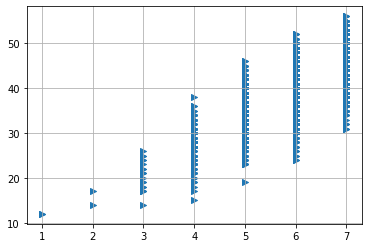

In [ ]:
plt.scatter(total['num_of_words'],total['num_of_letters'],  marker=">")
plt.grid()
plt.show()

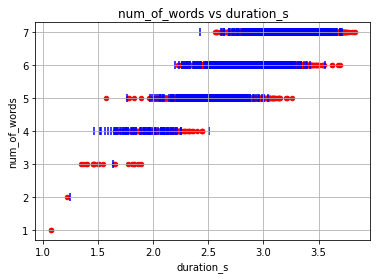

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['num_of_words'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['num_of_words'] , s=80,  marker="|", color ='blue')
plt.title("num_of_words" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel("num_of_words")
plt.grid()
plt.show()


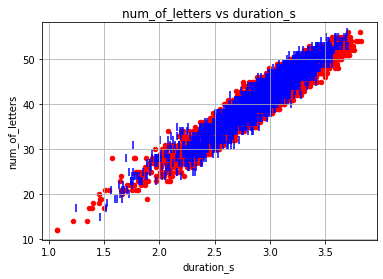

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['num_of_letters'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['num_of_letters'] , s=80,  marker="|", color ='blue')
plt.title("num_of_letters" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel('num_of_letters')
plt.grid()
plt.show()

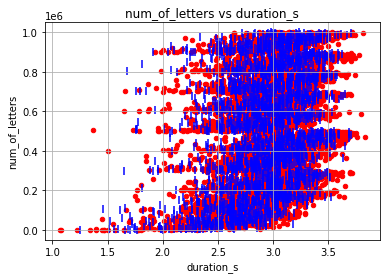

In [ ]:
total_fem = total.where(total['gender']== 'female').dropna()
total_mel = total.where(total['gender']== 'male').dropna()
plt.scatter(total_fem['duration_s'],total_fem['number'] , s=80,  marker=".", color ='red')
plt.scatter(total_mel['duration_s'],total_mel['number'] , s=80,  marker="|", color ='blue')
plt.title("num_of_letters" + " vs "+ "duration_s")
plt.xlabel("duration_s")
plt.ylabel('num_of_letters')
plt.grid()
plt.show()

In [ ]:
total.where(total['num_of_words']<3).dropna()

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
2968,train/c7d2263e89.wav,29278.0,1.219917,female,61.0,2.0,14.0,2.0,both
6127,train/ee643401ea.wav,25807.0,1.075292,female,14.0,1.0,12.0,2.0,both
7331,train/d8fc26da73.wav,29918.0,1.246583,male,670.0,2.0,17.0,3.0,both
7715,train/1339fd4329.wav,25689.0,1.070375,female,19.0,1.0,12.0,2.0,both


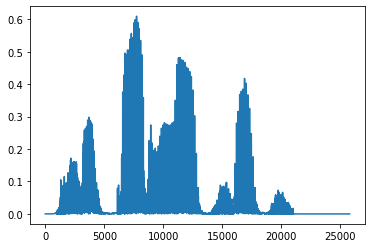

In [ ]:
waveform , sample_rate = torchaudio.load(INPUT_DIR+"/numbers/" +"train/ee643401ea.wav" )
draw_waveform(np.abs(waveform))

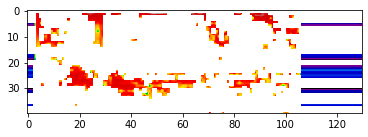

In [ ]:
draw_spectrogram(waveform, kind='mfcc', output_file='spectrogram')

In [ ]:
np.max(np.abs(waveform)[0].numpy())

0.60943604

In [ ]:
u_set = SoundDataset(train_csv , INPUT_DIR+"/numbers" )


In [ ]:
u_set[1]

{'gender': 'female',
 'number': 374554,
 'path': 'train/e25afda49a.wav',
 'sample_rate': 24000,
 'waveform': tensor([[0., 0., 0.,  ..., 0., 0., 0.]])}

In [ ]:
max = []
avg = []
std = []
paths = []
for i in range(len(u_set)):
  max.append(np.max(np.abs(u_set[i]['waveform'][0].numpy())))
  avg.append(np.mean(np.abs(u_set[i]['waveform'][0].numpy())))
  std.append(np.std(np.abs(u_set[i]['waveform'][0].numpy())))
  paths.append(u_set[i]['path'])

In [ ]:
d_1 = {'max': max, 
     'avg': avg,
     'std': std ,
     'path': paths }
waveform_stats = pd.DataFrame(data=d_1 )
waveform_stats.head()

,max,avg,std,path
0,0.625458,0.052513,0.077851,train/e332b996d3.wav
1,0.583923,0.058162,0.074381,train/e25afda49a.wav
2,0.462158,0.058781,0.064329,train/364f147340.wav
3,0.687164,0.064094,0.079569,train/5e0954b206.wav
4,0.467926,0.049549,0.069500,train/7130a67690.wav


In [ ]:
all_in = pd.merge(waveform_stats, total, on='path', how='outer', indicator=False)
all_in.head()

,max,avg,std,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
0,0.625458,0.052513,0.077851,train/e332b996d3.wav,56923,2.371792,female,157105.0,6,28,6,both
1,0.583923,0.058162,0.074381,train/e25afda49a.wav,80659,3.360792,female,374554.0,7,49,6,both
2,0.462158,0.058781,0.064329,train/364f147340.wav,84807,3.533625,male,688694.0,7,53,6,both
3,0.687164,0.064094,0.079569,train/5e0954b206.wav,80601,3.358375,female,265381.0,7,46,6,both
4,0.467926,0.049549,0.069500,train/7130a67690.wav,72957,3.039875,male,955415.0,6,46,6,both


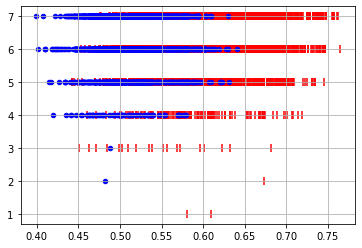

In [ ]:
fem = all_in.where(all_in['gender']== 'female').dropna()
mel = all_in.where(all_in['gender']== 'male').dropna()
plt.scatter(fem['max'],fem['num_of_words'] , s=80,  marker="|", color ='red')
plt.scatter(mel['max'],mel['num_of_words'] , s=80,  marker=".", color ='blue')
#plt.title("num_of_letters" + " vs "+ "duration_s")
#plt.xlabel("duration_s")
#plt.ylabel('num_of_letters')
plt.grid()
plt.show()

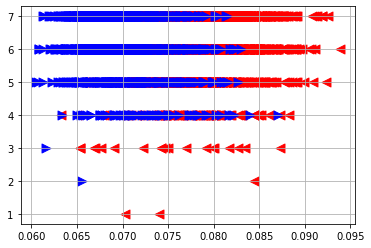

In [ ]:
fem = all_in.where(all_in['gender']== 'female').dropna()
mel = all_in.where(all_in['gender']== 'male').dropna()
plt.scatter(fem['std'],fem['num_of_words'] , s=80,  marker="<", color ='red')
plt.scatter(mel['std'],mel['num_of_words'] , s=80,  marker=">", color ='blue')
#plt.title("num_of_letters" + " vs "+ "duration_s")
#plt.xlabel("duration_s")
#plt.ylabel('num_of_letters')
plt.grid()
plt.show()

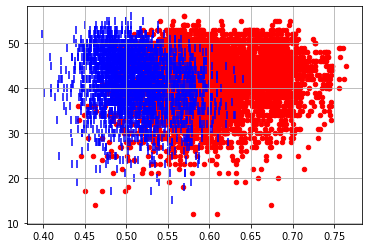

In [ ]:
fem = all_in.where(all_in['gender']== 'female').dropna()
mel = all_in.where(all_in['gender']== 'male').dropna()
plt.scatter(fem['max'],fem['num_of_letters'] , s=80,  marker=".", color ='red')
plt.scatter(mel['max'],mel['num_of_letters'] , s=80,  marker="|", color ='blue')
#plt.title("num_of_letters" + " vs "+ "duration_s")
#plt.xlabel("duration_s")
#plt.ylabel('num_of_letters')
plt.grid()
plt.show()

In [ ]:
total.where(all_in['gender']== 'female')

,path,frames,duration_s,gender,number,num_of_words,num_of_letters,num_of_digits,_merge
0,train/d56ee4cb49.wav,64326.0,2.680250,female,732115.0,6.0,37.0,6.0,both
1,train/9ddedee2aa.wav,83099.0,3.462458,male,781254.0,7.0,49.0,6.0,both
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,train/23367fea22.wav,69294.0,2.887250,male,915672.0,6.0,44.0,6.0,both
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
8995,train/b90381298e.wav,58417.0,2.434042,female,25532.0,6.0,35.0,5.0,both
8996,train/769ca2032a.wav,43592.0,1.816333,male,840001.0,4.0,23.0,6.0,both
8997,train/b4c275ce77.wav,60220.0,2.509167,female,939105.0,6.0,35.0,6.0,both
8998,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
import IPython.display as ipd

In [ ]:
ipd.Audio(u_set[1]['waveform'], rate=24000)


In [ ]:
s = u_set[1]['waveform']
t = torch.zeros_like(s)

for i in range(1,s.size()[1]-1):
    t[0][i] = (s[0][i-1]+s[0][i+1])/2 

for k in range(1):
  for i in range(1,s.size()[1]-1):
    t[0][i] = ((t[0][i-1]+t[0][i+1])/2)**3 



In [ ]:
ipd.Audio(t, rate=24000)

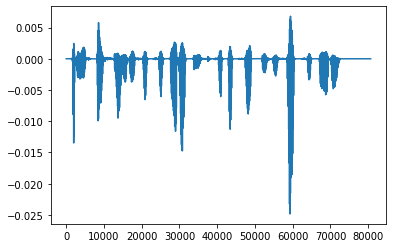

In [ ]:
draw_waveform(t)


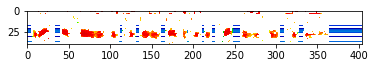

In [ ]:
draw_spectrogram(t, kind='mfcc', output_file='spectrogram')

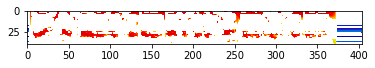

In [ ]:
draw_spectrogram(s, kind='mfcc', output_file='spectrogram')

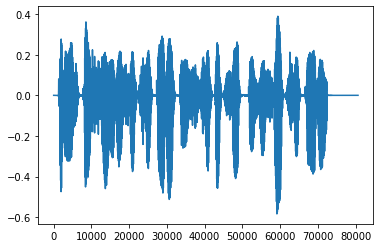

In [ ]:
draw_waveform(s)

In [ ]:
len(get_word_counter(total.number))

41

# Мой вклад

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np 
import sys
sys.path.insert(0, './asr-shad')
from audio_stats import get_audio_stats, get_audio_meta

In [ ]:
#import sys
#sys.path.insert(0, './asr-shad/')

from utils.text_stats import *
import torch
import torchaudio
from torch.utils.data import Dataset, DataLoader
from utils.sound_dataset import SoundDataset
from utils.torchaudio_methods import draw_waveform, draw_spectrogram
import IPython.display as ipd

In [ ]:
from tqdm import tqdm

In [ ]:
u_set = SoundDataset(train_csv , INPUT_DIR+"/numbers" )


In [ ]:
for i in range(24,9000):
  wave =  u_set[i]['waveform']
  if u_set[i]['gender'] =='female':
    if 'один' in num2text(u_set[i]['number']).split(' '):
      print(i)
      break

45


In [ ]:
u_set[i]

{'gender': 'female',
 'number': 1981,
 'path': 'train/c0d1e092f7.wav',
 'sample_rate': 24000,
 'waveform': tensor([[0., 0., 0.,  ..., 0., 0., 0.]])}

In [ ]:
ipd.Audio(wave, rate=24000)#триста

In [ ]:
ipd.Audio(wave[0][37000:46000], rate=24000)

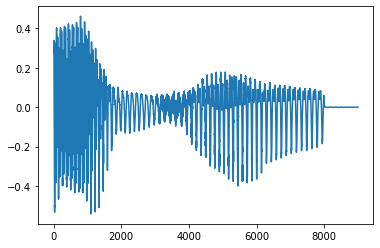

In [ ]:
draw_waveform(wave[0][37000:46000])

In [ ]:
torchaudio.save("drive/My Drive/parsed_numbers/female_1_odin.wav",wave[0][37000:46000], sample_rate= 24000)

In [ ]:
mf = {'восемнадцать': 'male_18.wav',
         'восемь': 'male_8.wav',
         'восемьдесят': 'male_80.wav',
         'восемьсот': 'male_800.wav',
         'два': 'male_2_dva.wav',
         'двадцать': "male_20.wav",
         'две': 'male_2_dve.wav',
         'двенадцать': "male_12.wav",
         'двести': 'male_200.wav',
         'девяносто': 'male_90.wav',
         'девятнадцать': 'male_19.wav',
         'девять': 'male_9.wav',
         'девятьсот': 'male_900.wav',
         'десять': 'male_10.wav',
         'один': 'male_1_odin.wav',
         'одиннадцать': 'male_11.wav',
         'одна': 'male_1_odna.wav',
         'пятнадцать': "male_15.wav",
         'пять': 'male_5.wav',
         'пятьдесят': 'male_50.wav',
         'пятьсот': 'male_500.wav',
         'семнадцать': 'male_17.wav',
         'семь': 'male_7.wav',
         'семьдесят': 'male_70.wav',
         'семьсот': 'male_700.wav',
         'сорок': 'male_40.wav',
         'сто': 'male_100.wav',
         'три': 'male_3.wav',
         'тридцать': 'male_30.wav',
         'тринадцать': 'male_13.wav',
         'триста': 'male_300.wav',
         'тысяч': 'male_1000_tisyach.wav',
         'тысяча': 'male_1000_tisyacha.wav',
         'тысячи': 'male_1000_tisyachi.wav',
         'четыре': 'male_4.wav',
         'четыреста': 'male_400.wav',
         'четырнадцать': 'male_14.wav',
         'шестнадцать': 'male_16.wav',
         'шесть': 'male_6.wav',
         'шестьдесят': 'male_60.wav',
         'шестьсот': 'fem_600.wav'}

In [ ]:
pf ={'восемнадцать': 'fem_18.wav',
         'восемь': 'fem_8.wav',
         'восемьдесят': 'fem_80.wav',
         'восемьсот': 'fem_800.wav',
         'два': 'fem_2_dva.wav',
         'двадцать': "fem_20.wav",
         'две': 'fem_2_dve.wav',
         'двенадцать': "fem_12.wav",
         'двести': 'fem_200.wav',
         'девяносто': 'fem_90.wav',
         'девятнадцать': 'fem_19.wav',
         'девять': 'fem_9.wav',
         'девятьсот': 'fem_900.wav',
         'десять': 'fem_10.wav',
         'один': 'fem_1_odin.wav',
         'одиннадцать': 'fem_11.wav',
         'одна': 'fem_1_odna.wav',
         'пятнадцать': "fem_15.wav",
         'пять': 'fem_5.wav',
         'пятьдесят': 'fem_50.wav',
         'пятьсот': 'fem_500.wav',
         'семнадцать': 'fem_17.wav',
         'семь': 'fem_7.wav',
         'семьдесят': 'fem_70.wav',
         'семьсот': 'fem_700.wav',
         'сорок': 'fem_40.wav',
         'сто': 'fem_100.wav',
         'три': 'fem_3.wav',
         'тридцать': 'fem_30.wav',
         'тринадцать': 'fem_13.wav',
         'триста': 'fem_300.wav',
         'тысяч': 'fem_1000_tisyach.wav',
         'тысяча': 'fem_1000_tisyacha.wav',
         'тысячи': 'fem_1000_tisyachi.wav',
         'четыре': 'fem_4.wav',
         'четыреста': 'fem_400.wav',
         'четырнадцать': 'fem_14.wav',
         'шестнадцать': 'fem_16.wav',
         'шесть': 'fem_6.wav',
         'шестьдесят': 'fem_60.wav',
         'шестьсот': 'fem_600.wav'}


In [ ]:
d =[18, 8, 80, 800, 2, 20, 2, 12, 200, 90, 19, 9, 900, 10, 1, 11, 1, 15, 5, 50, 500, 17, 7, 70, 700, 40, 100, 3, 30, 13, 300, 1000, 1000, 1000, 4, 400, 14, 16, 6, 60, 600]

In [ ]:
parsed_numbers = pd.DataFrame( data = {'word': [i for i in pf.keys()],
                                       'female':[pf[i] for i in pf.keys()], 
                                       'male':[mf[i] for i in pf.keys()] ,
                                       'number': d  } )
parsed_numbers.head(2)

,word,female,male,number
0,восемнадцать,fem_18.wav,male_18.wav,18
1,восемь,fem_8.wav,male_8.wav,8


In [ ]:
parsed_numbers.to_csv("drive/My Drive/parsed_numbers/parsed_numbers.csv", index=False)

# Краткое описание моей модели ASR для поставленной задачи